# 1. Logistic Regression

In [1]:
library(corrplot)

corrplot 0.90 loaded



In [2]:
mydata = read.csv("./data/binary.csv")

In [3]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [4]:
tail(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
395,1,460,3.99,3
396,0,620,4.00,2
397,0,560,3.04,3
398,0,460,2.63,2
399,0,700,3.65,2
400,0,600,3.89,3


In [5]:
summary(mydata)

     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

## 1.1. Trực quan hóa

In [6]:
install.packages("Amelia")

Installing package into ‘/home/manhcuong/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [7]:
library(Amelia)

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



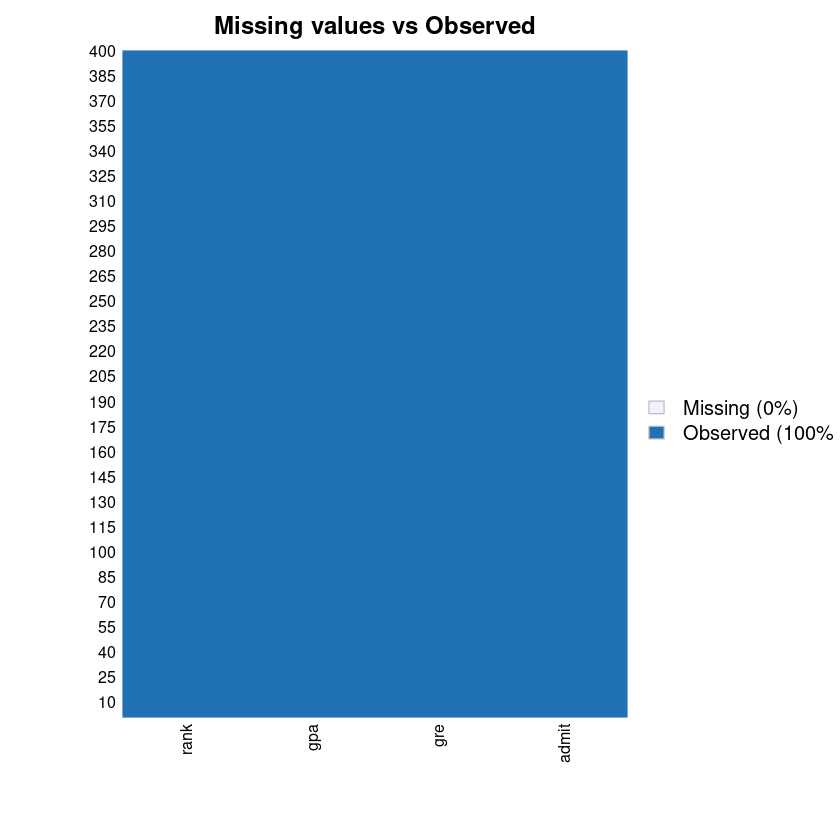

In [8]:
missmap(mydata, main = "Missing values vs Observed")

> **Nhận xét**
> * Ko có missing value

In [9]:
print(table(mydata$admit))


  0   1 
273 127 


> **Nhận xét**
> * Các class ko lệch nhiều

## 1.2. Kiểm tra outlier

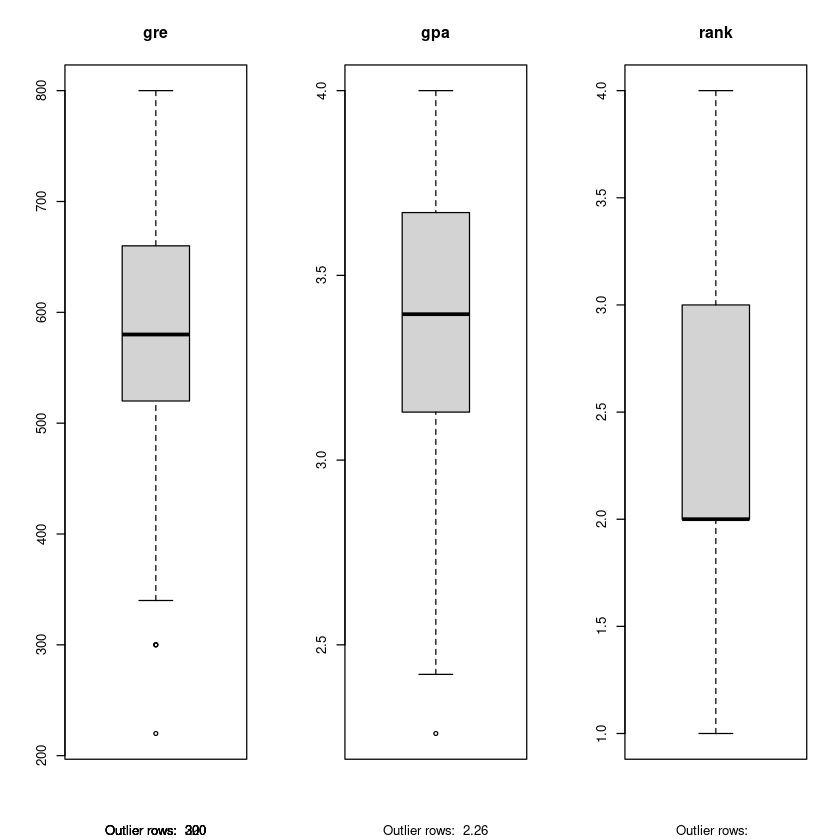

In [10]:
par(mfrow = c(1, 3))
boxplot(mydata$gre, main = 'gre',
        sub = paste("Outlier rows: ", boxplot.stats(mydata$gre)$out))
boxplot(mydata$gpa, main = 'gpa',
        sub = paste("Outlier rows: ", boxplot.stats(mydata$gpa)$out))
boxplot(mydata$rank, main = 'rank',
        sub = paste("Outlier rows: ", boxplot.stats(mydata$rank)$out))

In [11]:
gre_outliers = boxplot.stats(mydata$gre)$out
gpa_outliers = boxplot.stats(mydata$gpa)$out

mydata = mydata[!(mydata$gre %in% gre_outliers) & !(mydata$gpa %in% gpa_outliers),] 

In [12]:
nrow(mydata)

[1] 395

## 1.3. Tính correlation

In [13]:
correlations = cor(mydata[, 2:4])

print(correlations)

            gre         gpa        rank
gre   1.0000000  0.35937135 -0.10785090
gpa   0.3593714  1.00000000 -0.03994452
rank -0.1078509 -0.03994452  1.00000000


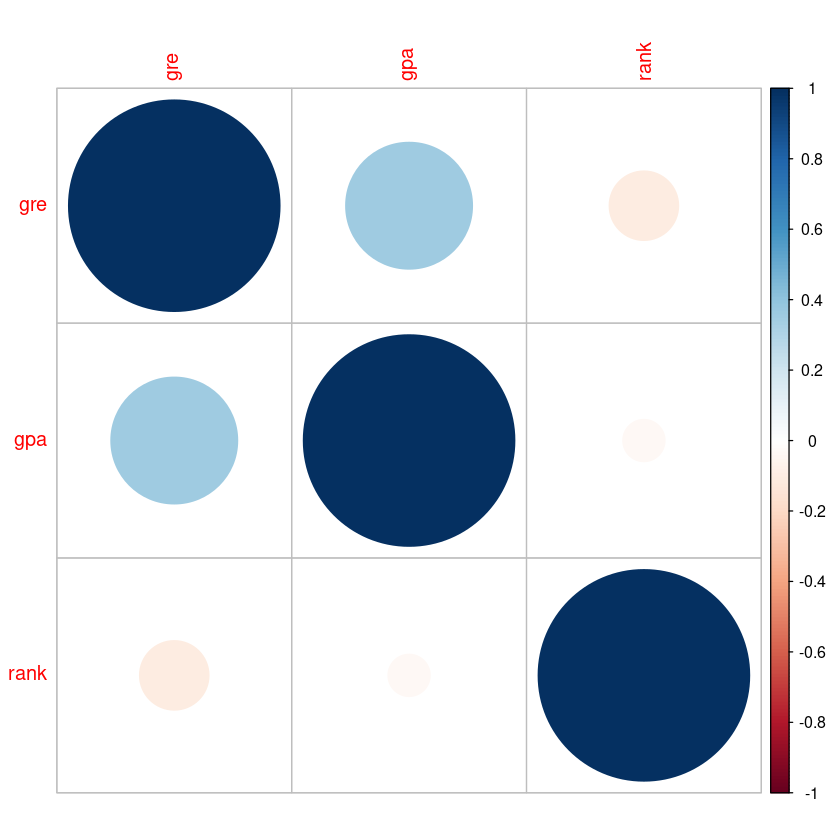

In [14]:
corrplot(correlations, method = 'circle')

## 1.4. Tạo training data và test data

In [15]:
n = nrow(mydata)
trainIndex = sample(1:n, size = round(0.7 * n), replace = FALSE)
train = mydata[trainIndex, ]
test = mydata[-trainIndex, ]

In [16]:
nrow(train)

[1] 276

In [17]:
nrow(test)

[1] 119

## 1.5. Build model

In [18]:
mylogit = glm(admit ~ gre + gpa + rank, data = train, family = 'binomial')

print(summary(mylogit))


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5826  -0.8709  -0.5931   1.0918   2.3062  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.341271   1.339950  -1.747   0.0806 .  
gre          0.002584   0.001336   1.934   0.0531 .  
gpa          0.516415   0.378869   1.363   0.1729    
rank        -0.736793   0.160265  -4.597 4.28e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 344.01  on 275  degrees of freedom
Residual deviance: 311.32  on 272  degrees of freedom
AIC: 319.32

Number of Fisher Scoring iterations: 4



## 1.6. Predict

In [19]:
pred = predict(mylogit, newdata = test, type = 'response')
pred_value = ifelse(pred > 0.5, 1, 0)

result = data.frame(testAdmit = test$admit[30:40], pred_value[30:40])

result

,testAdmit,pred_value.30.40.
,<int>,<dbl>
100,0,0
101,0,0
112,0,0
113,0,0
114,0,1
115,0,0
117,1,0
119,1,1
121,1,0


## 1.7. Evaluation

In [20]:
# Solution 1
accuracy = table(pred_value, test[, 'admit'])
accuracy = sum(diag(accuracy))/sum(accuracy)

accuracy

[1] 0.6554622

In [21]:
# Solution 2
install.packages("caret")

Installing package into ‘/home/manhcuong/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [22]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [23]:
confusionMatrix(factor(pred_value), factor(test$admit))

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 69 30
         1 11  9
                                          
               Accuracy : 0.6555          
                 95% CI : (0.5628, 0.7402)
    No Information Rate : 0.6723          
    P-Value [Acc > NIR] : 0.690245        
                                          
                  Kappa : 0.1066          
                                          
 Mcnemar's Test P-Value : 0.004937        
                                          
            Sensitivity : 0.8625          
            Specificity : 0.2308          
         Pos Pred Value : 0.6970          
         Neg Pred Value : 0.4500          
             Prevalence : 0.6723          
         Detection Rate : 0.5798          
   Detection Prevalence : 0.8319          
      Balanced Accuracy : 0.5466          
                                          
       'Positive' Class : 0               
                                    

## 1.8. Dự đoán cho sample mới

In [24]:
y1 = predict(mylogit, newdata = data.frame(gre = c(580, 800),
                                           gpa = c(3.4, 4),
                                           rank = c(3, 1)), type = 'response')

y1

1         2 
0.2146854 0.7417495

In [25]:
y1 = ifelse(y1 > 0.5, 1, 0)

y1

1 2 
0 1